# HOMEWORK: Yelp Reviews

### TASK 1: read the data from yelp.csv into a DataFrame

In [40]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [2]:
yelp = pd.read_csv('../data/yelp.csv')

In [12]:
yelp.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


### TASK 1 (ALTERNATIVE): construct the same DataFrame from yelp.json

* read the data from yelp.json into a list of rows
* each row is decoded into a dictionary using using json.loads()
* convert the list of dictionaries to a DataFrame
* add columns for cool, useful, and funny
* drop the votes column

In [7]:
import json

with open('../data/yelp.json', 'rU') as f:
    data = [json.loads(row) for row in f]

/Users/alexseong/miniconda3/envs/enterpriseml/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: 'U' mode is deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


In [8]:
data

[{'votes': {'funny': 0, 'useful': 5, 'cool': 2},
  'user_id': 'rLtl8ZkDX5vH5nAx9C3q5Q',
  'review_id': 'fWKvX83p0-ka4JS3dc6E5A',
  'stars': 5,
  'date': '2011-01-26',
  'text': 'My wife took me here on my birthday for breakfast and it was excellent.  The weather was perfect which made sitting outside overlooking their grounds an absolute pleasure.  Our waitress was excellent and our food arrived quickly on the semi-busy Saturday morning.  It looked like the place fills up pretty quickly so the earlier you get here the better.\n\nDo yourself a favor and get their Bloody Mary.  It was phenomenal and simply the best I\'ve ever had.  I\'m pretty sure they only use ingredients from their garden and blend them fresh when you order it.  It was amazing.\n\nWhile EVERYTHING on the menu looks excellent, I had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious.  It came with 2 pieces of their griddled bread with was amazing and it absolutely made the meal complete. 

In [9]:
yelp2 = pd.DataFrame(data)

In [10]:
yelp2

,business_id,date,review_id,stars,text,type,user_id,votes
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,"{'funny': 0, 'useful': 5, 'cool': 2}"
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,"{'funny': 0, 'useful': 0, 'cool': 0}"
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,"{'funny': 0, 'useful': 1, 'cool': 0}"
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,"{'funny': 0, 'useful': 2, 'cool': 1}"
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,"{'funny': 0, 'useful': 0, 'cool': 0}"
5,-yxfBYGB6SEqszmxJxd97A,2007-12-13,m2CKSsepBCoRYWxiRUsxAg,4,"Quiessence is, simply put, beautiful. Full wi...",review,sqYN3lNgvPbPCTRsMFu27g,"{'funny': 1, 'useful': 3, 'cool': 4}"
6,zp713qNhx8d9KCJJnrw1xA,2010-02-12,riFQ3vxNpP4rWLk_CSri2A,5,Drop what you're doing and drive here. After I...,review,wFweIWhv2fREZV_dYkz_1g,"{'funny': 4, 'useful': 7, 'cool': 7}"
7,hW0Ne_HTHEAgGF1rAdmR-g,2012-07-12,JL7GXJ9u4YMx7Rzs05NfiQ,4,"Luckily, I didn't have to travel far to make m...",review,1ieuYcKS7zeAv_U15AB13A,"{'funny': 0, 'useful': 1, 'cool': 0}"
8,wNUea3IXZWD63bbOQaOH-g,2012-08-17,XtnfnYmnJYi71yIuGsXIUA,4,Definitely come for Happy hour! Prices are ama...,review,Vh_DlizgGhSqQh4qfZ2h6A,"{'funny': 0, 'useful': 0, 'cool': 0}"
9,nMHhuYan8e3cONo3PornJA,2010-08-11,jJAIXA46pU1swYyRCdfXtQ,5,Nobuo shows his unique talents with everything...,review,sUNkXg8-KFtCMQDV6zRzQg,"{'funny': 0, 'useful': 1, 'cool': 0}"


In [13]:
# add columns for cool, useful, and funny
yelp2['cool'] = [row['votes']['cool'] for row in data]
yelp2['useful'] = [row['votes']['useful'] for row in data]
yelp2['funny'] = [row['votes']['funny'] for row in data]

In [14]:
# drop the votes column
yelp2.drop('votes', axis=1, inplace=True)

In [15]:
yelp2.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [17]:
yelp2.describe()

,stars,cool,useful,funny
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300
std,1.214636,2.067861,2.336647,1.907942
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,1.000000,0.000000
75%,5.000000,1.000000,2.000000,1.000000
max,5.000000,77.000000,76.000000,57.000000


### TASK 2: explore the relationship between cool/useful/funny and stars

* treat stars as a categorical variable and look for differences between groups
* correlation matrix
* scatter plot matrix
* limit scatter plot matrix and add regression lines

In [25]:
%matplotlib inline

# correlation matrix
import seaborn as sns

In [19]:
yelp2['stars'].value_counts()

4    3526
5    3337
3    1461
2     927
1     749
Name: stars, dtype: int64

In [21]:
yelp2.groupby('stars')['cool'].mean()

stars
1    0.576769
2    0.719525
3    0.788501
4    0.954623
5    0.944261
Name: cool, dtype: float64

In [22]:
yelp2.groupby('stars')['useful'].mean()

stars
1    1.604806
2    1.563107
3    1.306639
4    1.395916
5    1.381780
Name: useful, dtype: float64

In [23]:
yelp2.groupby('stars')['funny'].mean()

stars
1    1.056075
2    0.875944
3    0.694730
4    0.670448
5    0.608631
Name: funny, dtype: float64

In [33]:
yelp2.corr()

,stars,cool,useful,funny
stars,1.000000,0.052555,-0.023479,-0.061306
cool,0.052555,1.000000,0.887102,0.764342
useful,-0.023479,0.887102,1.000000,0.723406
funny,-0.061306,0.764342,0.723406,1.000000


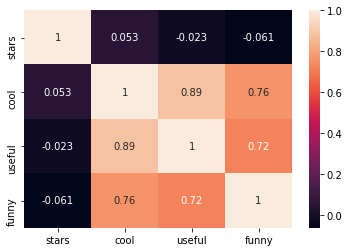

In [34]:
sns.heatmap(yelp2.corr(), annot=True)

/Users/alexseong/miniconda3/envs/enterpriseml/lib/python3.6/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


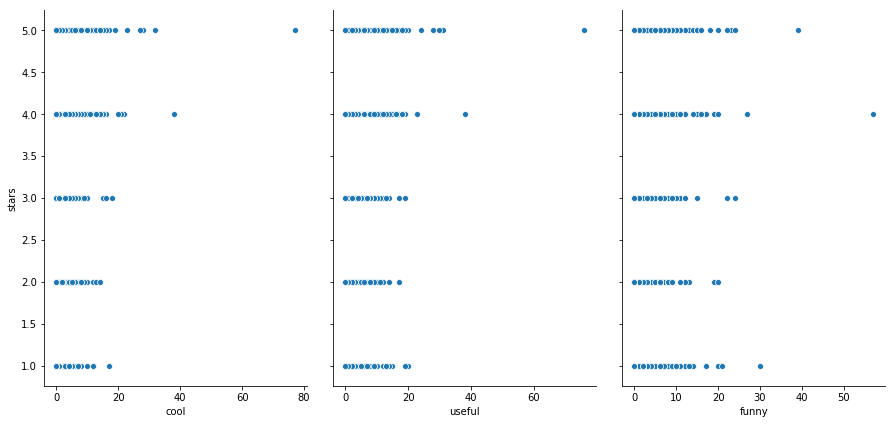

In [27]:
sns.pairplot(yelp2, x_vars=['cool', 'useful', 'funny'], y_vars='stars', size=6, aspect=0.7)

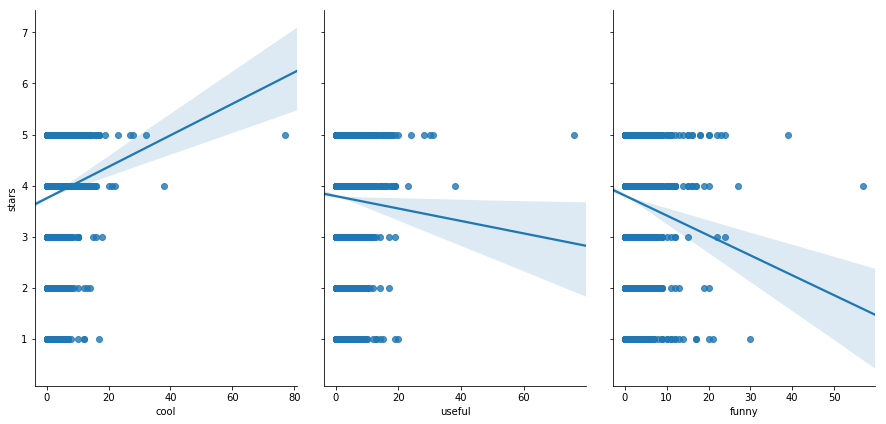

In [28]:
sns.pairplot(yelp2, x_vars=['cool', 'useful', 'funny'], y_vars='stars', size=6, aspect=0.7, kind='reg')

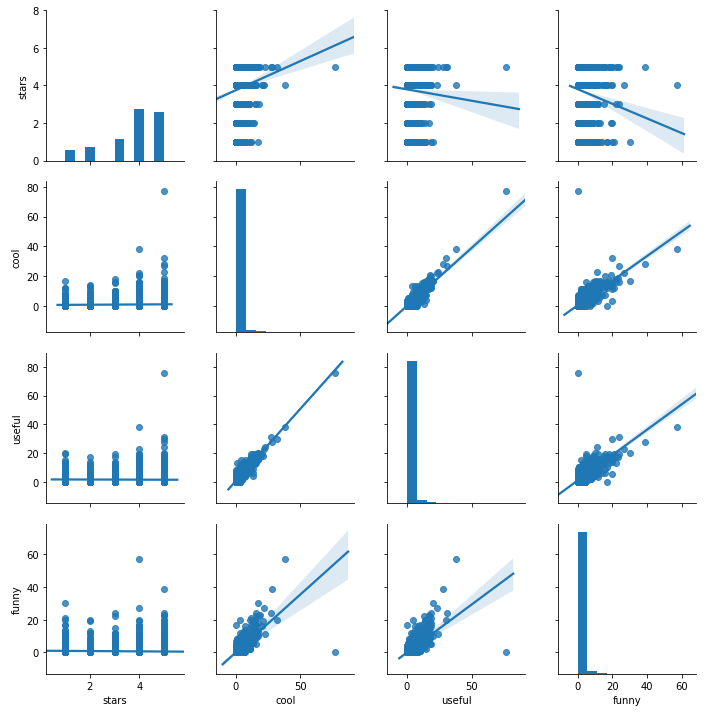

In [30]:
sns.pairplot(yelp2, diag_kind='hist', kind='reg')

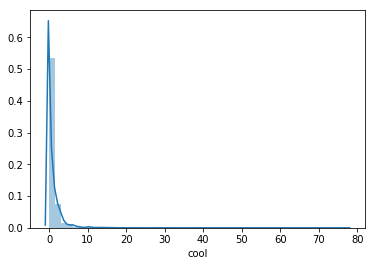

In [37]:
sns.distplot(yelp2.cool)

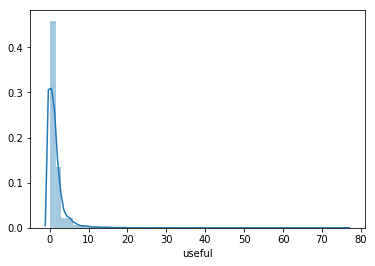

In [38]:
sns.distplot(yelp2.useful)

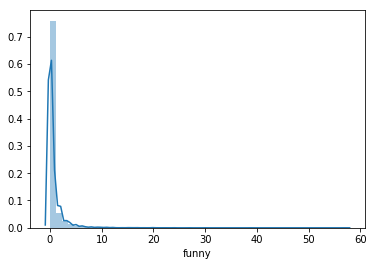

In [39]:
sns.distplot(yelp2.funny)

### TASK 3: define cool/useful/funny as the features and stars as the response

In [35]:
feature_cols = ['cool', 'useful', 'funny']
X = yelp2[feature_cols]
y = yelp2.stars

### TASK 4: fit a linear regression model and interpret the coefficients

In [ ]:
linreg = LinearRegression()
linreg.fit(X)


### TASK 5: use train/test split and RMSE to evaluate the model

In [ ]:

train_test_rmse(X, y)

### TASK 6: try removing some of the features and see if RMSE improves

### TASK 7 (BONUS): create new features, add them to the model, check RMSE

* new feature: review length (number of characters)
* new features: whether or not the review contains 'love' or 'hate'
* add new features to the model

### TASK 8 (BONUS): compare your best RMSE with RMSE for the null model

* split the data (outside of the function)
* use scikit-learn's built-in dummy regressor
* or, create a NumPy array with the right length, and fill it with the mean of y_train

### TASK 9 (BONUS): treat this as a classification problem, try KNN, maximize your accuracy

### TASK 10 (BONUS): use linear regression for classification, and compare accuracy with KNN

* use linear regression to make continuous predictions
* round its predictions to the nearest integer
* compute classification accuracy of the rounded predictions